#  Lesson 2. Spatial Raster Metadata: CRS, Resolution, and Extent in Python

https://www.earthdatascience.org/courses/earth-analytics-python/lidar-raster-data/raster-metadata-in-python/

In [8]:
import os
import earthpy as et
import rasterio as rio

In [9]:
# Get data and set wd
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))


# View Raster Coordinate Reference System (CRS) in Python

You can view the CRS string associated with your Python object using thecrs() method

In [11]:
# View crs of raster imported with rasterio
with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    print(src.crs)

## EPSG:32613


EPSG:32613


In [12]:
# Assign crs to myCRS object
myCRS = src.crs
myCRS


CRS.from_dict(init='epsg:32613')

# Converting EPSG to Proj4 in Python

A python package for this class called ‘earthpy’ contains a dictionary that will help you convert EPSG codes into a Proj4 string. This can be used with rasterio in order to determine the metadata for a given EPSG code. For example, if you wish to know the units of the EPSG code above, you can do the following

In [13]:
# Each key of the dictionary is an EPSG code
print(list(et.epsg.keys())[:10])


['29188', '26733', '24600', '32189', '4899', '29189', '26734', '7402', '26951', '29190']


In [14]:
# You can convert to proj4 like so:
proj4 = et.epsg['32613']
print(proj4)


+proj=utm +zone=13 +datum=WGS84 +units=m +no_defs


In [15]:
# Finally you can convert this into a rasterio CRS like so:
crs_proj4 = rio.crs.CRS.from_string(proj4)
crs_proj4


CRS.from_dict(init='epsg:32613')

# Important: IMPORTANT: You are working with lidar data which has a Z or vertical value as well. While the horizontal units often match the vertical units of a raster they don’t always! Be sure the check the metadata of your data to figure out the vertical units!

# Plot Raster Histograms

In [16]:
import os
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
import seaborn as sns

import earthpy as et
import earthpy.plot as ep

# Get data and set wd
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")


# As you did in the previous lessons, you can open your raster data using rio.open().

In [17]:
# Open data and assign negative values to nan
with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    lidar_dem_im = src.read(1, masked=True)

# View object dimensions
lidar_dem_im.shape


(2000, 4000)

# Raster Histograms - Distribution of Elevation Values

The histogram below represents the distribution of pixel elevation values in your data. This plot is useful to:

    Identify outlier data values
    Assess the min and max values in your data
    Explore the general distribution of elevation values in the data - i.e. is the area generally flat, hilly, is it high elevation or low elevation.

To begin, you will look at the shape of your lidar array object

In [18]:
# The .ravel method turns an 2-D numpy array into a 1-D vector
print(lidar_dem_im.shape)
print(lidar_dem_im.ravel().shape)


(2000, 4000)
(8000000,)


### If your array has nan values in it, it’s best to remove the nan values before trying to plot a histogram. To do this, you would:

    flatten the data so it can be coerced into a histogram using .ravel()
    remove nan values lidar_dem_hist[~np.isnan(lidar_dem_hist)]

However, since you used masked=True while opening the raster, the nan values have already been removed by the masking operation.

Once you have cleaned up the data you can plot a histogram.

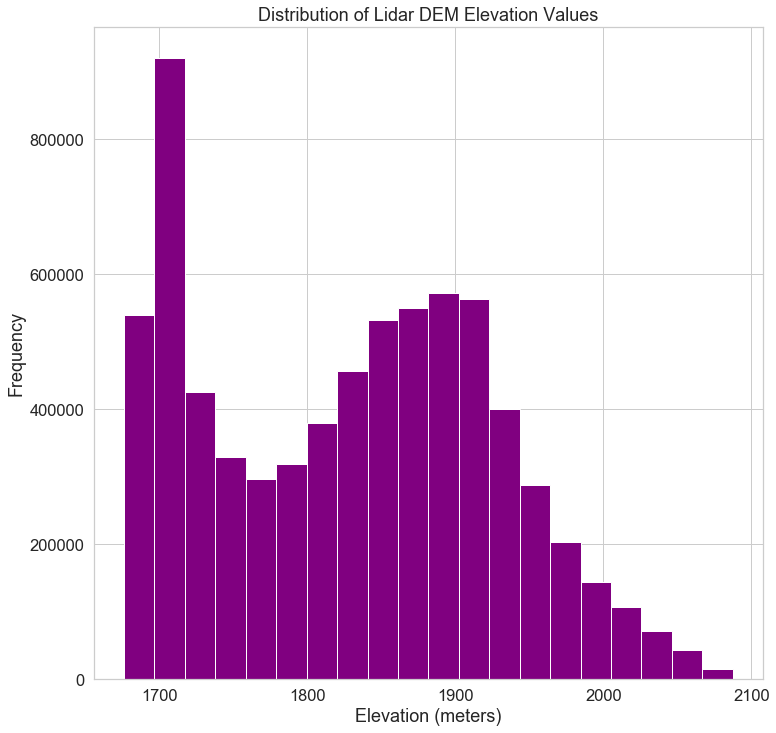

In [19]:
ep.hist(lidar_dem_im, colors=['purple'],
        title="Distribution of Lidar DEM Elevation Values",
        xlabel='Elevation (meters)',
        ylabel='Frequency')
plt.show()
